# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [297]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

In [298]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [299]:
X = df.drop(columns = 'price')
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.80, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
test = X_test.join(y_test)

I hypothesize that you can accurately predict the price of a house based on the square footage of the lot it is on. 

In [338]:
feature = 'sqft_lot'
df['pred'] = df[target].mean()

In [301]:
print('target mean:')
print(df[target].mean())
print()
print('root mean absolute error of inital prediciton: ')
print(np.sqrt(mean_absolute_error(y_true = df[target],
                          y_pred = df['pred'])))
print()
print('R^2 score: ')
print(r2_score(y_true=df[target], y_pred=df['pred']))


target mean:
540088.1417665294

root mean absolute error of inital prediciton: 
483.67522602724614

R^2 score: 
0.0



That is a pretty wide margin and give me a loose baseline to work with. The $R^2$ is also pretty terrible. 

In [302]:
def error(): 
    
    '''For quickly getting my error metrics
        Work with existing variables in this notebook'''
    
    
    train_true = y_train
    train_predict = model.predict(y_train)
    train_error = np.sqrt(mean_absolute_error(train_true, train_predict))
    train_r2 = r2_score(y_true = train_true, y_pred = train_predict)
    
    
    test_true = y_test
    test_predict = model.predict(y_test)
    test_error = np.sqrt(mean_absolute_error(test_true, test_predict))
    test_r2 = r2_score(y_true = test_true, y_pred = test_predict)
    
    print('Train Error: ', train_error, '... R^2:',  train_r2)
    print('Test Error: ', test_error, '... R^2:', test_r2)

In [339]:
model = LinearRegression()
model.fit(X_train[[feature]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [340]:
model.predict(X_test[[feature]])

array([[532764.11757768],
       [530931.47317481],
       [534458.6570163 ],
       ...,
       [528957.33472882],
       [533793.55028665],
       [534950.07345351]])

In [344]:
model.predict(X_test[[feature]])

array([[532764.11757768],
       [530931.47317481],
       [534458.6570163 ],
       ...,
       [528957.33472882],
       [533793.55028665],
       [534950.07345351]])

In [304]:
m = model.coef_ 
b = model.intercept_

x = np.linspace(0,500000, 1000)
yy = m*x + b


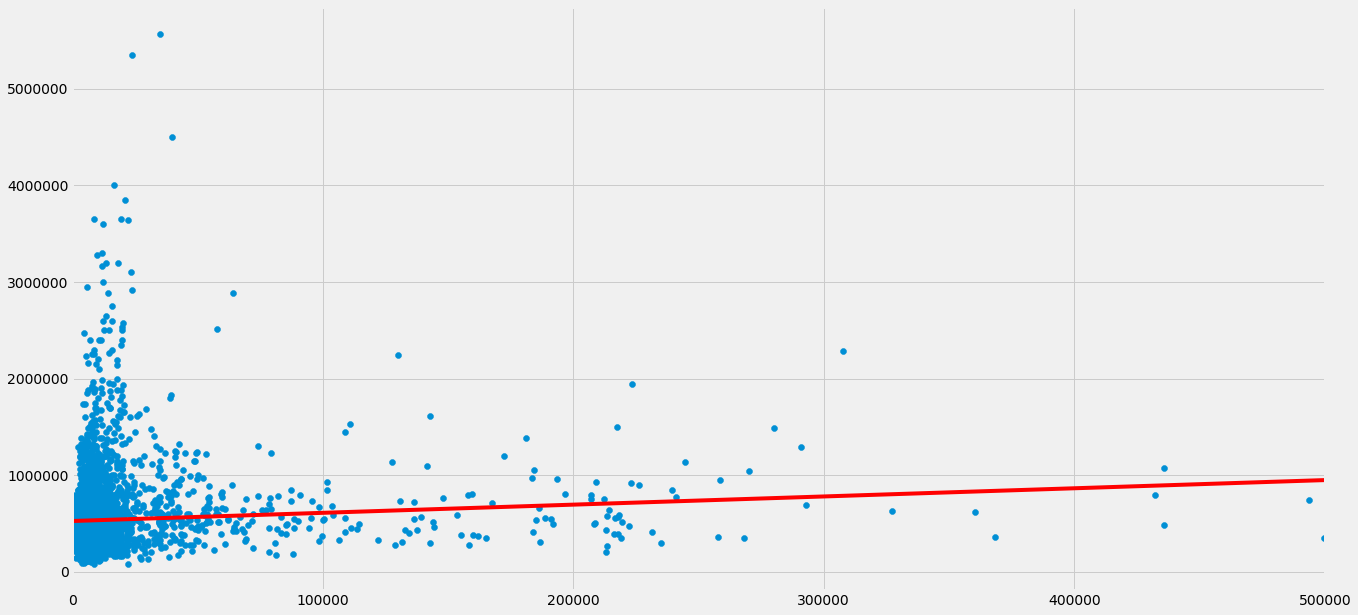

In [305]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,10))
plt.xlim(0,500000)

plt.scatter(test[feature], y = test[target])
plt.plot(x,yy.reshape(-1,1), color = 'red')

In [346]:
error()

Train Error:  479.96024996176726 ... R^2: 0.008288101908683676
Test Error:  488.95543081857744 ... R^2: 0.006175047825244251


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

Lets see what other categories have a low mean absolute error from the data. I'm just going to brute force my way through this one to cherry pick a second feature. 

In [345]:
def error(): 
    
    '''For quickly getting my error metrics
        Work with existing variables in this notebook'''
    
    
    train_true = y_train
    train_predict = model.predict(X_train[[feature]])
    train_error = np.sqrt(mean_absolute_error(train_true, train_predict))
    train_r2 = r2_score(y_true = train_true, y_pred = train_predict)
    
    
    test_true = y_test
    test_predict = model.predict(X_test[[feature]])
    test_error = np.sqrt(mean_absolute_error(test_true, test_predict))
    test_r2 = r2_score(y_true = test_true, y_pred = test_predict)
    
    print('Train Error: ', train_error, '... R^2:',  train_r2)
    print('Test Error: ', test_error, '... R^2:', test_r2)

In [314]:
columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'pred']

In [319]:
columns = df.drop(columns = ['id','date','price','pred']).columns.values.tolist()

errors = []
for column in columns: 
    feature = column
    model.fit(X_train[[feature]], y_train)
    errors.append(feature)
    errors.append(np.sqrt(mean_absolute_error(y_test, model.predict(y_test))))
    
errors

['bedrooms',
 256364.5610730004,
 'bathrooms',
 369294.29487711104,
 'sqft_living',
 12368.78845519591,
 'sqft_lot',
 664.6871914443503,
 'floors',
 304481.33934318624,
 'waterfront',
 771518.3384003098,
 'view',
 319713.27707517816,
 'condition',
 105233.355395171,
 'grade',
 335925.8583242244,
 'sqft_above',
 12054.601954145972,
 'sqft_basement',
 12057.29506623738,
 'yr_built',
 18166.777860146885,
 'yr_renovated',
 7976.909234030189,
 'zipcode',
 12829.828532845024,
 'lat',
 667646.5106619938,
 'long',
 182213.01505410613,
 'sqft_living15',
 13008.476501433946,
 'sqft_lot15',
 739.0571676852348]

Lets use year renovated as our second feature. 

In [335]:
feature = ['sqft_lot', 'yr_renovated']

In [336]:
model.fit(X_train[feature], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [215]:
m = model.coef_ 
b = model.intercept_

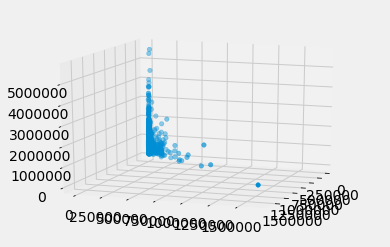

In [296]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test[feature],test[feature], test['price'])
ax.view_init(15, 20)

ax.plot_surface()    

plt.show();

In [337]:
error()

Train Error:  478.2318887130211 ... R^2: 0.02425194793546792
Test Error:  486.9680509836969 ... R^2: 0.02155258618141409


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [264]:
feature = columns

In [265]:
model.fit(X_train[feature], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [266]:
error()

Train Error:  353.600289787814 ... R^2: 0.6991021854487472
Test Error:  357.0620983618541 ... R^2: 0.7011904448878181


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
